# Set up TensorFlow

Import TensorFlow into your program to get started:

In [2]:
import os
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"
#  TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt

print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
# tf.debugging.set_log_device_placement(True)

2022-11-18 21:42:06.897867: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.10.0
Num GPUs Available:  1


2022-11-18 21:42:08.724966: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-18 21:42:08.731098: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-18 21:42:08.731264: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


# Load a dataset

Load and prepare the MNIST dataset. Convert the sample data from integers to floating-point numbers:

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build a machine learning model

Build a tf.keras.Sequential model by stacking layers.

In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

2022-11-18 21:42:21.715458: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-18 21:42:21.717188: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-18 21:42:21.717589: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-18 21:42:21.717845: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have be

For each example, the model returns a vector of logits or log-odds scores, one for each class.

In [5]:
predictions = model(x_train[:1]).numpy()
predictions

2022-11-18 21:42:25.010878: I tensorflow/stream_executor/cuda/cuda_blas.cc:1633] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


array([[ 0.2226629 ,  0.39887452,  0.3395915 ,  0.6637764 ,  0.42544332,
         0.52963567,  0.71809846,  0.22063702, -0.551983  , -0.09879568]],
      dtype=float32)

The tf.nn.softmax function converts these logits to probabilities for each class:

In [6]:
tf.nn.softmax(predictions).numpy()

array([[0.08864917, 0.10573103, 0.09964515, 0.13779956, 0.10857782,
        0.12050117, 0.14549217, 0.08846976, 0.04085547, 0.06427868]],
      dtype=float32)

Define a loss function for training using losses.SparseCategoricalCrossentropy, which takes a vector of logits and a True index and returns a scalar loss for each example.

In [7]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

This loss is equal to the negative log probability of the true class: The loss is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to -tf.math.log(1/10) ~= 2.3.

In [8]:
loss_fn(y_train[:1], predictions).numpy()

2.1160958

Before you start training, configure and compile the model using Keras Model.compile. Set the optimizer class to adam, set the loss to the loss_fn function you defined earlier, and specify a metric to be evaluated for the model by setting the metrics parameter to accuracy.

In [9]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

# Train and evaluate your model

Use the Model.fit method to adjust your model parameters and minimize the loss:

In [16]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0644 - accuracy: 0.9792
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0586 - accuracy: 0.9804
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0514 - accuracy: 0.9830
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0467 - accuracy: 0.9844
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0446 - accuracy: 0.9856


The Model.evaluate method checks the models performance, usually on a "Validation-set" or "Test-set".

In [17]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0731 - accuracy: 0.9789 - 523ms/epoch - 2ms/step


[0.07305692881345749, 0.9789000153541565]

The image classifier is now trained to ~98% accuracy on this dataset. To learn more, read the TensorFlow tutorials.

If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:

In [28]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

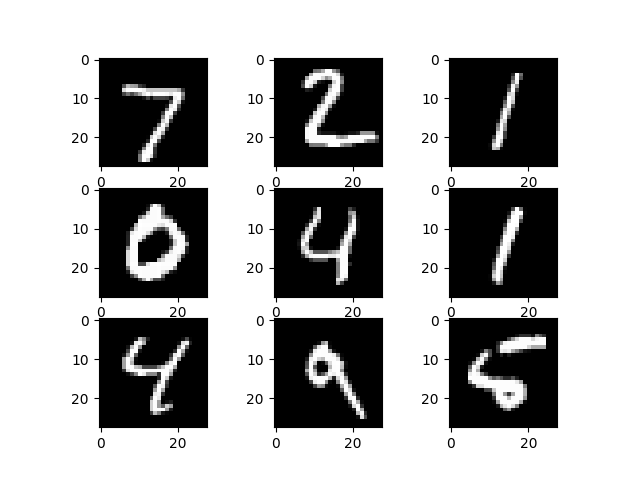

In [51]:
mnist = tf.keras.datasets.mnist

_, (x_test_img, y_test_img) = mnist.load_data()
for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(x_test_img[i], cmap=plt.get_cmap('gray'))
plt.show()
# probability_model(x_test[:5])